In [214]:
from tabulate import tabulate
import pandas as pd

In [215]:
#fething the csv file from my googel drive 
!py -m pip install google
from google.colab import drive

drive.mount('/content/drive')


data = pd.read_csv('/content/drive/My Drive/TAD/Reviews.csv')

/bin/bash: py: command not found
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [216]:
#read the file into dataframe
df = pd.DataFrame(data)

In [217]:
#printing the contents from my dataframe 
print(df[['ProductId','Score','Summary','Text']])


         ProductId  Score                             Summary  \
0       B001E4KFG0      5               Good Quality Dog Food   
1       B00813GRG4      1                   Not as Advertised   
2       B000LQOCH0      4               "Delight" says it all   
3       B000UA0QIQ      2                      Cough Medicine   
4       B006K2ZZ7K      5                         Great taffy   
...            ...    ...                                 ...   
568449  B001EO7N10      5                 Will not do without   
568450  B003S1WTCU      2                        disappointed   
568451  B004I613EE      5            Perfect for our maltipoo   
568452  B004I613EE      5  Favorite Training and reward treat   
568453  B001LR2CU2      5                         Great Honey   

                                                     Text  
0       I have bought several of the Vitality canned d...  
1       Product arrived labeled as Jumbo Salted Peanut...  
2       This is a confection that has b

In [218]:
#Dropping duplicate rows 
df = df.drop_duplicates(subset={"UserId","ProfileName","Time","Text"})

In [219]:
#Extracting only rows where Helpfulness Numerator is less than or equal to Helpfulness Denominator
df = df[df['HelpfulnessNumerator'] <= df['HelpfulnessDenominator']]

In [220]:
#Dropping unnecessary columns
df = df.drop(columns=['Id','UserId','ProfileName','HelpfulnessNumerator','HelpfulnessDenominator','Time'])
print(df)



         ProductId  Score                             Summary  \
0       B001E4KFG0      5               Good Quality Dog Food   
1       B00813GRG4      1                   Not as Advertised   
2       B000LQOCH0      4               "Delight" says it all   
3       B000UA0QIQ      2                      Cough Medicine   
4       B006K2ZZ7K      5                         Great taffy   
...            ...    ...                                 ...   
568449  B001EO7N10      5                 Will not do without   
568450  B003S1WTCU      2                        disappointed   
568451  B004I613EE      5            Perfect for our maltipoo   
568452  B004I613EE      5  Favorite Training and reward treat   
568453  B001LR2CU2      5                         Great Honey   

                                                     Text  
0       I have bought several of the Vitality canned d...  
1       Product arrived labeled as Jumbo Salted Peanut...  
2       This is a confection that has b

In [221]:
#Converting the scores to corresponding sentiment
sntmt_list=[]
for i,rows in df.iterrows():
    if(rows['Score']>3):
        sntmt_list.append('Positive')
    elif(rows['Score']==3):
        sntmt_list.append('Nuetral')
    else:
        sntmt_list.append('Negative')
        
df.loc[:, "Sentiment"] = sntmt_list

In [222]:
df = df.head(2000)

In [223]:
df['Text'] = df['Summary'] + ' ' + df['Text']

<ipython-input-223-87713448f58d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Text'] = df['Summary'] + ' ' + df['Text']


In [224]:
X_temp = df['Text']
y = df['Sentiment']

In [225]:
print(X_temp, y)

0       Good Quality Dog Food I have bought several of...
1       Not as Advertised Product arrived labeled as J...
2       "Delight" says it all This is a confection tha...
3       Cough Medicine If you are looking for the secr...
4       Great taffy Great taffy at a great price.  The...
                              ...                        
1998    Good pancakes, lots of work I love this pancak...
1999    waffles, schmaffles !! What can i say??  They ...
2000    Awesome I usually make pancakes from scratch a...
2001    Great tasting pancake  mix This is the best ta...
2002    Stonewall Pancake Mix My family absolutely lov...
Name: Text, Length: 2000, dtype: object 0       Positive
1       Negative
2       Positive
3       Negative
4       Positive
          ...   
1998    Positive
1999    Positive
2000    Positive
2001    Positive
2002    Positive
Name: Sentiment, Length: 2000, dtype: object


In [226]:
#Load spacy
import spacy

nlp = spacy.load("en_core_web_sm")



In [227]:
tokenised = []
tokenised_texts = []
X_t = []
temp = []
for text in X_temp:
  X_t = nlp(text)
  tokenised = [(token.lemma_).lower() for token in X_t if not token.is_stop and not token.is_punct and not token.is_space]
  tokenised_texts.append(tokenised)



In [228]:
print(tokenised_texts)

[['good', 'quality', 'dog', 'food', 'buy', 'vitality', 'can', 'dog', 'food', 'product', 'find', 'good', 'quality', 'product', 'look', 'like', 'stew', 'process', 'meat', 'smell', 'well', 'labrador', 'finicky', 'appreciate', 'product', 'well'], ['advertised', 'product', 'arrive', 'label', 'jumbo', 'salted', 'peanuts', 'peanut', 'actually', 'small', 'sized', 'unsalted', 'sure', 'error', 'vendor', 'intend', 'represent', 'product', 'jumbo'], ['delight', 'say', 'confection', 'century', 'light', 'pillowy', 'citrus', 'gelatin', 'nut', 'case', 'filberts', 'cut', 'tiny', 'square', 'liberally', 'coat', 'powdered', 'sugar', 'tiny', 'mouthful', 'heaven', 'chewy', 'flavorful', 'highly', 'recommend', 'yummy', 'treat', 'familiar', 'story', 'c.s.', 'lewis', 'lion', 'witch', 'wardrobe', 'treat', 'seduce', 'edmund', 'sell', 'brother', 'sisters', 'witch'], ['cough', 'medicine', 'look', 'secret', 'ingredient', 'robitussin', 'believe', 'find', 'get', 'addition', 'root', 'beer', 'extract', 'order', 'good', '

In [229]:
tokenised_joined=[]
for i in tokenised_texts:
  tokenised_joined.append(' '.join(i))


In [230]:
print(tokenised_joined[0:5])

['good quality dog food buy vitality can dog food product find good quality product look like stew process meat smell well labrador finicky appreciate product well', 'advertised product arrive label jumbo salted peanuts peanut actually small sized unsalted sure error vendor intend represent product jumbo', 'delight say confection century light pillowy citrus gelatin nut case filberts cut tiny square liberally coat powdered sugar tiny mouthful heaven chewy flavorful highly recommend yummy treat familiar story c.s. lewis lion witch wardrobe treat seduce edmund sell brother sisters witch', 'cough medicine look secret ingredient robitussin believe find get addition root beer extract order good cherry soda flavor medicinal', 'great taffy great taffy great price wide assortment yummy taffy delivery quick taffy lover deal']


In [231]:
# # Using TF-IDF Word2Vec Model for vectorization
# split_data = []
# for row in X_list: 
#     split_data.append([word for word in row.split()]) 
# from sklearn.feature_extraction.text import TfidfVectorizer
# from gensim.models import Word2Vec      
# word2vec_model = Word2Vec(split_data, min_count=5, vector_size=50, workers=4)    


In [232]:
# Using TF-IDF for vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_model = TfidfVectorizer(max_features=50)
tf_data = tf_idf_model.fit_transform(tokenised_joined)
print(tf_data[1])
print(tf_data[0][0].shape)

  (0, 32)	1.0
(1, 50)


In [233]:
# Convert the sparse matrix to a dense matrix
dense_matrix = tf_data.toarray()

# Create a list of dictionaries
data_list = []
for row in dense_matrix:
    tf_data_dict = {}
    for i, value in enumerate(row):
        tf_data_dict[i] = value
    data_list.append(tf_data_dict)


In [234]:
print(data_list[0])

{0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.1606356296512812, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.5108187235281736, 12: 0.0, 13: 0.0, 14: 0.1729450226737015, 15: 0.0, 16: 0.39196071662087945, 17: 0.0, 18: 0.0, 19: 0.2468678767390163, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.0, 24: 0.13788664598287179, 25: 0.0, 26: 0.21999371102111118, 27: 0.0, 28: 0.0, 29: 0.0, 30: 0.0, 31: 0.0, 32: 0.49694969616368595, 33: 0.0, 34: 0.0, 35: 0.0, 36: 0.0, 37: 0.0, 38: 0.0, 39: 0.0, 40: 0.0, 41: 0.0, 42: 0.0, 43: 0.0, 44: 0.0, 45: 0.0, 46: 0.0, 47: 0.0, 48: 0.39294342191461534, 49: 0.0}


In [235]:
print(tokenised_joined[0])

good quality dog food buy vitality can dog food product find good quality product look like stew process meat smell well labrador finicky appreciate product well


In [236]:
mini_tokenized = [ x.split() for x in tokenised_joined ]

In [237]:
print(mini_tokenized[1])

['advertised', 'product', 'arrive', 'label', 'jumbo', 'salted', 'peanuts', 'peanut', 'actually', 'small', 'sized', 'unsalted', 'sure', 'error', 'vendor', 'intend', 'represent', 'product', 'jumbo']


In [238]:
def make_vocabulary(corpus):
    d={}
    count=0
    for i in corpus:
        for k in i:
            if k not in d.keys():
                d[k]=count
                count+=1

    return d

In [239]:
from collections import Counter
def doc_frequency(corpus):
    doc_freq = Counter()
    for d in corpus:
        unique_tokens = set(list(d.split()))
        for t in unique_tokens:
            doc_freq[t] += 1
        

    return doc_freq

In [240]:
vocab = make_vocabulary(mini_tokenized)

In [241]:
# X = pd.Series(X_list)
# print(X)

In [242]:
doc_freq = doc_frequency(tokenised_joined)

In [243]:
#1-c splitting of dataset
X = pd.Series(tokenised_joined)
print(X)
from sklearn.model_selection import train_test_split
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.25, random_state=42)
#Dataset is split into 60,20 and 20 percent for Train, Validation and Test
total = len(X_train) + len(X_val) + len(X_test)
len(X_train)/total, len(X_val)/total, len(X_test)/total

0       good quality dog food buy vitality can dog foo...
1       advertised product arrive label jumbo salted p...
2       delight say confection century light pillowy c...
3       cough medicine look secret ingredient robituss...
4       great taffy great taffy great price wide assor...
                              ...                        
1995    good pancake lot work love pancake mix buy foo...
1996    waffle schmaffle wonderful highlight weekend o...
1997    awesome usually pancake scratch find mix taste...
1998    great taste pancake mix good taste pancake mix...
1999    stonewall pancake mix family absolutely love p...
Length: 2000, dtype: object


(0.6, 0.2, 0.2)

In [244]:
from collections import Counter
counts_train = Counter(y_train)
counts_train

Counter({'Positive': 951, 'Negative': 162, 'Nuetral': 87})

In [245]:
df1 = pd.DataFrame.from_dict(counts_train, orient='index').reset_index()
df1

,index,0
0,Positive,951
1,Negative,162
2,Nuetral,87


In [246]:
counts_val = Counter(y_val)
counts_val

Counter({'Positive': 306, 'Nuetral': 36, 'Negative': 58})

In [247]:
df2 = pd.DataFrame.from_dict(counts_val, orient='index').reset_index()
df2

,index,0
0,Positive,306
1,Nuetral,36
2,Negative,58


In [248]:
counts_test = Counter(y_test)
counts_test

Counter({'Positive': 301, 'Negative': 61, 'Nuetral': 38})

In [249]:
df_labels = pd.DataFrame()

In [250]:
df_labels['Positive']=[counts_train['Positive'],counts_val['Positive'],counts_test['Positive']]
df_labels['Nuetral']=[counts_train['Nuetral'],counts_val['Nuetral'],counts_test['Nuetral']]
df_labels['Negative']=[counts_train['Negative'],counts_val['Negative'],counts_test['Negative']]
df_labels.index = ['Train','Validation','Test']
df_labels
#no of tweets respectively in different split sets 

,Positive,Nuetral,Negative
Train,951,87,162
Validation,306,36,58
Test,301,38,61


In [251]:
# make_tfidf_sparse(tokens, vocab, doc_freq, N)

In [252]:
print(len(vocab))

8138


In [253]:
import random

def init_centroids(num_clusters, vector_dim, random_seed=42):
    # use a random seed to ensure consistent vectors across runs
    rng = random.Random(random_seed)
    centroids = []
    for _ in range(num_clusters):
        new_centroid = {i: rng.random() for i in range(vector_dim)}
        centroids.append(new_centroid)
    return centroids

In [254]:
centroids = init_centroids(3, len(vocab))
len(centroids[0])

8138

In [255]:
# def assign_centroids(vecs, centroids):
#     assignments=[]
#     for vec in vecs:
#         min_dist = cosine_similarity(vec, centroids[0])
#         pos = 0
#         for i in range(len(centroids)):
#             dist = cosine_similarity(vec, centroids[i])
#             print(str(dist) + "to " + str(i))
#             if dist < min_dist :
#                 min_dist = dist
#                 pos = i
#         assignments.append(pos)
#     return assignments
            
        

In [256]:
def sparse_dot_prod(sv1, sv2):
    dot_prod = 0
    indices = set(sv1).intersection(sv2)
    for i in indices:
        dot_prod += sv1.get(i,0) * sv2.get(i,0)
    return dot_prod

In [257]:
import math
def cosine_similarity(sv1, sv2):
    x = math.sqrt( sum( val*val for index,val in sv1.items() ) )
    y = math.sqrt( sum( val*val for index,val in sv2.items() ) )

    return sparse_dot_prod(sv1,sv2) / (x*y)

In [258]:
def assign_clusters(vectors, centroids):
    cluster_ids = []
    for vector in vectors:
        similarities = [cosine_similarity(vector, centroid) for centroid in centroids]
        cluster_id = max(range(len(centroids)), key=similarities.__getitem__)
        cluster_ids.append(cluster_id)
    return cluster_ids

In [259]:
assign_clusters([{0:1}, {1:1}, {0:-1}],
                [{0:1}, {1:1}])

[0, 1, 1]

In [260]:
cluster_ids = assign_clusters(data_list, centroids)

<ipython-input-257-6ac84c90adc3>:6: RuntimeWarning: invalid value encountered in double_scalars
  return sparse_dot_prod(sv1,sv2) / (x*y)


In [261]:
def compute_centroids(vectors, cluster_ids):
    centroids = {}
    cluster_sizes = {}

    for vector, cluster_id in zip(vectors, cluster_ids):
        if cluster_id not in centroids:
            centroids[cluster_id] = {}
            cluster_sizes[cluster_id] = 0

        for feature, value in vector.items():
            if feature not in centroids[cluster_id]:
                centroids[cluster_id][feature] = 0
            centroids[cluster_id][feature] += value

        cluster_sizes[cluster_id] += 1

    for cluster_id in centroids:
        for feature in centroids[cluster_id]:
            centroids[cluster_id][feature] /= cluster_sizes[cluster_id]

    return [centroids[cluster_id] for cluster_id in centroids]


In [262]:
compute_centroids(data_list, cluster_ids)

[{0: 0.04053130866359598,
  1: 0.04055474791411938,
  2: 0.03864512297689473,
  3: 0.016741986280197144,
  4: 0.10387856656451158,
  5: 0.025597468227386604,
  6: 0.07391906374997095,
  7: 0.09918794465897203,
  8: 0.010624960023091512,
  9: 0.04177939004679953,
  10: 0.053445711828955245,
  11: 0.03803253993010351,
  12: 0.07088874041403231,
  13: 0.02575887073913491,
  14: 0.05193881862057022,
  15: 0.08191047502078974,
  16: 0.050934404867312474,
  17: 0.0159891675811517,
  18: 0.03710536384826267,
  19: 0.12781039768084299,
  20: 0.08795901857938859,
  21: 0.02526140789483946,
  22: 0.01371352848339689,
  23: 0.020493792353565563,
  24: 0.07784091424166341,
  25: 0.05215742603203242,
  26: 0.038024709183403144,
  27: 0.1190350780612196,
  28: 0.02373165544388687,
  29: 0.04748328909310071,
  30: 0.010481102604623434,
  31: 0.05562838818944216,
  32: 0.07498078688612515,
  33: 0.01989423202750299,
  34: 0.03932710955904484,
  35: 0.03423977265282049,
  36: 0.029443975863533953,
  37

In [263]:
def KMeans_Implementation(n_clusters, vocab, vectors):
  i= 0

  #Select n random centroids
  centroids = init_centroids(n_clusters, len(vocab))

  #Assign the data to its closest centroid
  cluster_ids = assign_clusters(vectors, centroids)
  prev_cluster_ids = cluster_ids

  while i == 0 or count_diff > 0:
    #Recalculate the centroids & re-assign
    centroids = compute_centroids(vectors, cluster_ids)
    cluster_ids = assign_clusters(vectors, centroids)

    # Repeat until convergence
    count_diff = sum(current != previous for current, previous in zip(cluster_ids, prev_cluster_ids))
    prev_cluster_ids = cluster_ids
    print('No of clusters changed after iteration '+ str(i) + ": " + str(count_diff))
    i += 1
      
  print('Convergence Achieved')
  return cluster_ids, centroids

In [264]:
# values=[2,3,4,5,6,7,8,9]
# loss=[]

# for i in values:
#     kmeans = KMeans(n_clusters=i, n_init=5,n_jobs=-1).fit(X_train_BOW)
#     loss_data.append(kmeans.inertia_)

In [265]:
cluster_ids, centroids = KMeans_Implementation(5, vocab, data_list)
print(cluster_ids)
print(centroids)

<ipython-input-257-6ac84c90adc3>:6: RuntimeWarning: invalid value encountered in double_scalars
  return sparse_dot_prod(sv1,sv2) / (x*y)


No of clusters changed after iteration 0: 1645
No of clusters changed after iteration 1: 1336
No of clusters changed after iteration 2: 1437
No of clusters changed after iteration 3: 98
No of clusters changed after iteration 4: 61
No of clusters changed after iteration 5: 45
No of clusters changed after iteration 6: 46
No of clusters changed after iteration 7: 46
No of clusters changed after iteration 8: 57
No of clusters changed after iteration 9: 128
No of clusters changed after iteration 10: 130
No of clusters changed after iteration 11: 74
No of clusters changed after iteration 12: 59
No of clusters changed after iteration 13: 63
No of clusters changed after iteration 14: 55
No of clusters changed after iteration 15: 800
No of clusters changed after iteration 16: 20
No of clusters changed after iteration 17: 13
No of clusters changed after iteration 18: 3
No of clusters changed after iteration 19: 4
No of clusters changed after iteration 20: 3
No of clusters changed after iteration

In [266]:
# print(index_to_text)

In [267]:
new = pd.DataFrame()
new['Text'] = df['Text']
new['Vectorized Text'] = data_list
new['Cluster_Ids']=cluster_ids
new['Sentiment']=df['Sentiment']

In [268]:
print(len(cluster_ids))

2000


In [269]:
new

,Text,Vectorized Text,Cluster_Ids,Sentiment
0,Good Quality Dog Food I have bought several of...,"{0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0....",0,Positive
1,Not as Advertised Product arrived labeled as J...,"{0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0....",1,Negative
2,"""Delight"" says it all This is a confection tha...","{0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0....",1,Positive
3,Cough Medicine If you are looking for the secr...,"{0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0....",2,Negative
4,Great taffy Great taffy at a great price. The...,"{0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0....",1,Positive
...,...,...,...,...
1998,"Good pancakes, lots of work I love this pancak...","{0: 0.5042007277251838, 1: 0.0, 2: 0.0, 3: 0.0...",1,Positive
1999,"waffles, schmaffles !! What can i say?? They ...","{0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0....",1,Positive
2000,Awesome I usually make pancakes from scratch a...,"{0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0....",1,Positive
2001,Great tasting pancake mix This is the best ta...,"{0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0....",1,Positive


In [270]:
#2-a to check for documents for each cluster
def print_examples_from_cluster(key):
  count = 0
  print("docs for cluster:", key)
  for i in new.iterrows():
    if(i[1]['Cluster_Ids'])==key:
      #p
      print(i[1]['Text'])
      count+=1
      if count==10:
        print('\n')
        break
    


In [271]:
for i in range(5):
  print_examples_from_cluster(i)

docs for cluster: 0
Good Quality Dog Food I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.
Healthy Dog Food This is a very healthy dog food. Good for their digestion. Also good for small puppies. My dog eats her required amount at every feeding.
My cats LOVE this "diet" food better than their regular food One of my boys needed to lose some weight and the other didn't.  I put this food on the floor for the chubby guy, and the protein-rich, no by-product food up higher where only my skinny boy can jump.  The higher food sits going stale.  They both really go for this food.  And my chubby boy has been losing about an ounce a week.
My Cats Are Not Fans of the New Food My cats have been happily eating Felidae Platinum for more than two years. I just got a new bag and the shape of

In [272]:
#(2a) find the top tokens with highest magnitude for each cluster
#---------------------this is useless and needs to be removed
import numpy as np
def top_tokens(k):
  for i in range(k):
      docs_in_cluster = new[new['Cluster_Ids']== i]['Vectorized Text'] # select document vectors in cluster i
      l = list(docs_in_cluster[0].values())
      centroid = np.mean(l, axis=0) # calculate the centroid vector
      top_tokens_idx = np.argsort(-centroid)[:5] # get the indices of the top 5 tokens with highest magnitude
      print(top_tokens_idx)
      top_tokens = [list(vocab.keys())[list(vocab.values()).index(idx)] for idx in top_tokens_idx] # map the indices back to vocabulary terms
      print("Cluster: %d,  top tokens:%d", + i+1, top_tokens)

In [273]:

for i in range (5):
  values = list(centroids[i].values())
  values.sort(reverse=True)
  print("for centroid ",i)
  print(values)




for centroid  0
[0.3240707451165345, 0.24464753603511946, 0.19147837983992677, 0.08111181869962285, 0.07125238009845433, 0.06400571052038227, 0.06319019592121328, 0.05499738121191735, 0.05180694185829556, 0.05034766572015253, 0.04882666183881792, 0.04392047818124601, 0.036476247142150524, 0.0361926740404655, 0.03608068072049075, 0.03569955015828539, 0.03288984797520905, 0.03273056054967398, 0.030803979836911296, 0.028413763752295308, 0.02748634879408977, 0.026691401418017877, 0.025541867762971727, 0.025481230397206973, 0.02545791613228538, 0.025057807015571396, 0.024731522849328107, 0.022852275680847776, 0.022836417504955284, 0.022664260909507412, 0.02240688430628355, 0.02233211017432687, 0.020984425250526805, 0.020034498509215695, 0.018856578516494818, 0.017885012953378777, 0.01787983372335365, 0.016509096987317475, 0.016158054736587612, 0.015386545072384445, 0.013981779063558082, 0.013800126639691964, 0.010635013431835207, 0.007632019222005958, 0.0073035358090952655, 0.00652160873353

In [274]:
# (2a) find the top tokens with highest magnitude for each cluster

top_tokens_idx0 = np.argsort(list(centroids[0].values()))[ :5]
top_tokens_idx1 = np.argsort(list(centroids[1].values()))[ :5]
top_tokens_idx2 = np.argsort(list(centroids[2].values()))[ :5]
top_tokens_idx3 = np.argsort(list(centroids[3].values()))[ :5]
top_tokens_idx4 = np.argsort(list(centroids[4].values()))[ :5]

In [275]:
print("top 5 tokens for cluster 0")
[list(vocab.keys())[list(vocab.values()).index(idx)] for idx in top_tokens_idx0]
#top_tokens = [list(centroids[0].keys())[i] for i in np.argsort(list(centroids[0].values()))[:5]]
#print(top_tokens)




top 5 tokens for cluster 0


['product', 'jumbo', 'delight', 'sure', 'pillowy']

In [276]:
print("top 5 tokens for cluster 1")
[list(vocab.keys())[list(vocab.values()).index(idx)] for idx in top_tokens_idx1]

top 5 tokens for cluster 1


['jumbo', 'citrus', 'stew', 'product', 'find']

In [277]:
print("top 5 tokens for cluster 2")
[list(vocab.keys())[list(vocab.values()).index(idx)] for idx in top_tokens_idx2]

top 5 tokens for cluster 2


['jumbo', 'stew', 'label', 'citrus', 'sure']

In [278]:
print("top 5 tokens for cluster 3")
[list(vocab.keys())[list(vocab.values()).index(idx)] for idx in top_tokens_idx3]

top 5 tokens for cluster 3


['citrus', 'find', 'stew', 'liberally', 'intend']

In [279]:
print("top 5 tokens for cluster 4")
[list(vocab.keys())[list(vocab.values()).index(idx)] for idx in top_tokens_idx4]

top 5 tokens for cluster 4


['citrus', 'find', 'stew', 'century', 'cut']

In [280]:
for i in range(5):
  temp = new[new['Cluster_Ids']== i]
  print(Counter(temp['Sentiment']))


Counter({'Positive': 204, 'Negative': 30, 'Nuetral': 16})
Counter({'Positive': 578, 'Negative': 101, 'Nuetral': 61})
Counter({'Positive': 179, 'Negative': 45, 'Nuetral': 18})
Counter({'Positive': 241, 'Negative': 51, 'Nuetral': 36})
Counter({'Positive': 356, 'Negative': 54, 'Nuetral': 30})


In [281]:
print(list(vocab.keys())[list(vocab.values()).index(843)]) 

starve


In [282]:
Counter(new['Sentiment'])

Counter({'Positive': 1558, 'Negative': 281, 'Nuetral': 161})

In [283]:
Counter(new['Cluster_Ids'])

Counter({0: 250, 1: 740, 2: 242, 3: 328, 4: 440})

In [284]:
count_Correct = 0
for i in new.iterrows():
  if(((i[1]['Sentiment']=='Positive') and (i[1]['Cluster_Ids']==0)) or ((i[1]['Sentiment']=='Nuetral') and (i[1]['Cluster_Ids']==2))or ((i[1]['Sentiment']=='Negative') and (i[1]['Cluster_Ids']==2))):
    count_Correct+=1

In [285]:
print(count_Correct)

267


In [286]:
# Dummy Classifier with strategy="most_frequent"
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


In [287]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)


DummyClassifier(strategy='most_frequent')

In [288]:
y_pred = dummy_clf.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy}")
#---------
y_pred = dummy_clf.predict(X_val)
macro_precision = precision_score(y_val, y_pred, average='macro')
print(f"Macro-average Precision: {macro_precision}")
#---------

recall = recall_score(y_val, y_pred, average='macro')
print(f"Recall: {recall}")

#--------------


y_pred = dummy_clf.predict(X_val)
f1 = f1_score(y_val, y_pred, average='macro')
print(f"F1 score: {f1}")


Accuracy: 0.765
Macro-average Precision: 0.255
Recall: 0.3333333333333333
F1 score: 0.28895184135977336


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [289]:
# Dummy Classifier with strategy="stratified"
dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(X_train, y_train)


DummyClassifier(strategy='stratified')

In [290]:
y_pred = dummy_clf.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy}")

#---------
y_pred = dummy_clf.predict(X_val)
macro_precision = precision_score(y_val, y_pred, average='macro')
print(f"Macro-average Precision: {macro_precision}")
#---------

recall = recall_score(y_val, y_pred, average='macro')
print(f"Recall: {recall}")

#--------------


y_pred = dummy_clf.predict(X_val)
f1 = f1_score(y_val, y_pred, average='macro')
print(f"F1 score: {f1}")


Accuracy: 0.6275
Macro-average Precision: 0.3542294554952783
Recall: 0.3550446998722861
F1 score: 0.32414529914529916


In [291]:
#Logistic Regression with tf-idf vectorization
tfidf = TfidfVectorizer()
tfidf.fit(X_train)


TfidfVectorizer()

In [292]:
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [293]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_tfidf, y_train)


LogisticRegression()

In [294]:
y_pred = lr.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
#---------
y_pred = lr.predict(X_test_tfidf)
precision = precision_score(y_test, y_pred, average='macro')
print(f"Macro-averaged precision score: {precision}")

#---------
y_pred = lr.predict(X_test_tfidf)
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall score: {recall}")


#---------
y_pred = lr.predict(X_test_tfidf)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 score: {f1}")


Accuracy: 0.7625
Macro-averaged precision score: 0.5867003367003366
Recall score: 0.7625
F1 score: 0.6687046683589009


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [295]:
#Logistic Regression with one-hot vectorization
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(binary=True)
vectorizer.fit(X_train)


CountVectorizer(binary=True)

In [296]:
X_train_onehot = vectorizer.transform(X_train)
X_val_onehot = vectorizer.transform(X_val)


In [297]:
print(X_train_onehot)

  (0, 73)	1
  (0, 471)	1
  (0, 575)	1
  (0, 934)	1
  (0, 1119)	1
  (0, 1457)	1
  (0, 1606)	1
  (0, 1613)	1
  (0, 1614)	1
  (0, 1848)	1
  (0, 1956)	1
  (0, 2029)	1
  (0, 2843)	1
  (0, 2891)	1
  (0, 3107)	1
  (0, 3316)	1
  (0, 3653)	1
  (0, 4714)	1
  (0, 4850)	1
  (0, 4856)	1
  (0, 5143)	1
  (1, 68)	1
  (1, 219)	1
  (1, 294)	1
  (1, 366)	1
  :	:
  (1198, 2140)	1
  (1198, 2574)	1
  (1198, 2638)	1
  (1198, 2843)	1
  (1198, 3346)	1
  (1198, 3422)	1
  (1198, 3892)	1
  (1198, 4011)	1
  (1198, 4124)	1
  (1198, 4196)	1
  (1198, 4217)	1
  (1198, 4768)	1
  (1198, 4999)	1
  (1198, 5066)	1
  (1198, 5175)	1
  (1198, 5299)	1
  (1199, 228)	1
  (1199, 629)	1
  (1199, 779)	1
  (1199, 2183)	1
  (1199, 2627)	1
  (1199, 3193)	1
  (1199, 4524)	1
  (1199, 4658)	1
  (1199, 4888)	1


In [298]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train_onehot, y_train)


LogisticRegression(random_state=42)

In [299]:
y_pred = lr.predict(X_val_onehot)
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy}")

precision = precision_score(y_val, y_pred, average='macro')
print(f"Macro-averaged precision score: {precision}")
recall = recall_score(y_val, y_pred, average='macro')


print(f"Macro-averaged recall score: {recall}")
f1 = f1_score(y_val, y_pred, average='macro')
print(f"Macro-averaged F1 score: {f1:.4f}")







Accuracy: 0.7975
Macro-averaged precision score: 0.4891669374932293
Macro-averaged recall score: 0.44996619337390126
Macro-averaged F1 score: 0.4558


In [300]:
#SVC Classifier with One-hot vectorization (SVM with RBF kernel, default settings)
from sklearn.svm import SVC


#Using X_train_onehot and X_val_onehot from previous code

svc = SVC()
svc.fit(X_train_onehot, y_train)
y_pred = svc.predict(X_val_onehot)
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy}")
recall = recall_score(y_val, y_pred, average='macro')
print(f"recall score: {recall:.4f}")

f1 = f1_score(y_val, y_pred, average='macro')
print(f"Macro-averaged F1 score: {f1:.4f}")
precision = precision_score(y_val, y_pred, average='macro')
print(f"Macro-averaged precision score: {precision:.4f}")

Accuracy: 0.77
recall score: 0.3448
Macro-averaged F1 score: 0.3120
Macro-averaged precision score: 0.5896


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


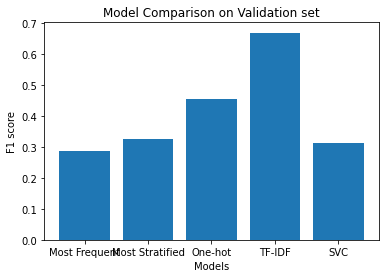

In [301]:
#comparing classfiers
import matplotlib.pyplot as plt

# Define the models and their corresponding scores
models = ['Most Frequent', 'Most Stratified',  'One-hot', 'TF-IDF', 'SVC']
accuracies = [0.288, 0.326, 0.455,0.668, 0.312]

# Plot the bar chart
plt.bar(models, accuracies)

# Add labels and title
plt.xlabel('Models')
plt.ylabel('F1 score')
plt.title('Model Comparison on Validation set')

# Show the plot
plt.show()


In [311]:
#Fit the GridSearchCV object to the training data -4
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_iris
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

grid_search = GridSearchCV(SVC(), param_grid, cv=5)

grid_search.fit(X_train, y_train)
#Print the best hyperparameters

print(f"Best hyperparameters: {grid_search.best_params_}")

#Use the best hyperparameters to make predictions on the validation data y pred grid_search.predict(X_val)

#Calculate the evaluation metrics on the validation data

accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='macro') 
recall = recall_score(y_val, y_pred, average='macro' )
fl= fl_score(y_val, y_pred, average='macro')

#Print the evaluation metrics

from prettytable import PrettyTable

# Define the table header

table= PrettyTable()

table.field_names = ["Metric", "Score"]

#Add the data rows to the table

table.add_row(["Accuracy", accuracy])
table.add_row(["Precision", precision])
table.add_row(["Recall", recall])
table.add_row(["F1", f1])

ValueError: ignored

In [302]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding
!pip install Transformers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [303]:
X_train

940     baby favorite dinner month old baby love earth...
1594    dog like great value live rural area drive tow...
428     kettle potato chip sweet onion wow eat potato ...
1346    sorry taste pleasing buy husband love ranch us...
1933    safe read previous review carefully inspect ca...
                              ...                        
19      home deliver twizler candy deliver fast purcha...
659     healthy sweetener order product time happy del...
1172    addict eat 5 year old favorite chip world not eat
592     good deal close expiration date love sea salt ...
653     great buy time agave nectar great keep blood s...
Length: 1200, dtype: object

In [313]:
#BERT
from transformers import pipeline

pipe = pipeline(model="roberta-base")


MASK_TOKEN = tokenizer.mask_token
X_train.to_list()
pipe("This restaurant is awesome{}.".format(MASK_TOKEN))
!pip install transformers
from transformers import pipeline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [314]:
def encode_text(text):
  extractor = pipeline(model="roberta-base", task="feature-extraction", batch_size=10, padding=True, truncation=True)
  result = extractor(X_train[0:500].to_list(), return_tensors=True)
  return result

import numpy as np
train_roberta = np.array([encode_text(text) for text in X_train])
val_roberta = np.array([encode_text(text) for text in X_val])

lr_model = LogisticRegression()
lr_model.fit(train_roberta, X_train)

# Evaluate on validation set
val_preds = lr_model.predict(val_roberta)
print(classification_report(y_val, val_preds))

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.dense.weight', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.dense.weight', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaMod

KeyboardInterrupt: ignored

In [304]:

from sklearn.metrics import classification_report
from transformers import RobertaTokenizer, RobertaModel
import torch
import numpy as np

# Load pre-trained RoBERTa model and tokenizer
model_name = 'roberta-base'
tokenizer = RobertaTokenizer.from_pretrained(model_name)
model = RobertaModel.from_pretrained(model_name)

# Define a function to encode text using RoBERTa and extract the first context vector
def encode_text(text):
    input_ids = tokenizer.encode(text, max_length= 514, add_special_tokens=True, truncation = True)
    inputs = torch.tensor([input_ids])
    outputs = model(inputs)[0]
    return outputs[0][0].detach().numpy()

# Encode training and validation data using RoBERTa
train_roberta = np.array([encode_text(text) for text in X_train])
val_roberta = np.array([encode_text(text) for text in X_val])

# Train logistic regression classifier on RoBERTa-encoded training data
lr_model = LogisticRegression()
lr_model.fit(train_roberta, y_train)

# Evaluate on validation set
val_preds = lr_model.predict(val_roberta)
print(classification_report(y_val, val_preds))



Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.dense.weight', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


IndexError: ignored

In [ ]:
from transformers import Trainer, TrainingArguments, RobertaForSequenceClassification
# Set up training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=1,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    learning_rate=1e-4,
    weight_decay=0.0,
    logging_dir='./logs',
    logging_steps=10,
    eval_steps=50,
    evaluation_strategy='steps'
)

# Load pre-trained RoBERTa model and create a new sequence classification head
model = RobertaForSequenceClassification.from_pretrained("roberta-base")

# Train the model using the Trainer function
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=X_train.to_list(),
    eval_dataset=X_val.to_list()
)

trainer.train()

# Evaluate the trained model on the validation set
eval_results = trainer.evaluate(y_val)
print(eval_results)